# About Dataset

This dataset is a valuable resource for healthcare professionals, data scientists, and enthusiasts interested in exploring the world of medicines and healthcare products. It contains a rich repository of information scraped from 1mg, a popular online pharmacy and healthcare platform, covering over 11,000 medicines.

### Features
- Medicine Name: The dataset includes the names of over 11,000 medicines, making it a comprehensive collection of pharmaceutical products.

- Salt Composition: For each medicine, you'll find detailed information about the active ingredients (salts) used in its formulation. Understanding the salt composition is vital for medical professionals and researchers studying drug interactions and effects.

- Uses: Discover the various medical conditions and ailments for which these medicines are prescribed or recommended. This information can be invaluable for healthcare practitioners and researchers conducting studies on treatment efficacy.

- Manufacturer: The dataset also provides insights into the manufacturers of these medicines. This can be helpful for quality control analysis, supply chain management, and identifying trends in pharmaceutical production.

- Image URL: Access to image URLs for each medicine allows users to view product images, facilitating product identification and visual analysis.

- Review Percentage (Excellent, Average, Poor): This dataset includes review percentages divided into three categories: "Excellent," "Average," and "Poor." These columns provide a nuanced understanding of user satisfaction and feedback for each medicine.


URL: https://www.kaggle.com/datasets/singhnavjot2062001/11000-medicine-details

# Loading the dataset

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Medicine_Details.csv')

In [4]:
data.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [5]:
import numpy as np
data.shape

(11825, 9)

# Data Preprocessing

In [7]:
# Checking for missing values
missing_values_initial = data.isnull().sum()
print(f"Missing Values Initial: \n{missing_values_initial}")

Missing Values Initial: 
Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64


# Exploratory Data Analysis (EDA)

In [9]:
# basic information about the dataset
basic_info = data.info()

# summary statistics for numerical columns
summary_stats = data.describe()

display(basic_info)
display(summary_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Image URL           11825 non-null  object
 5   Manufacturer        11825 non-null  object
 6   Excellent Review %  11825 non-null  int64 
 7   Average Review %    11825 non-null  int64 
 8   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB


None

,Excellent Review %,Average Review %,Poor Review %
count,11825.000000,11825.000000,11825.000000
mean,38.516025,35.756364,25.727611
std,25.225343,18.268134,23.991985
min,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,34.000000,35.000000,22.000000
75%,51.000000,47.000000,35.000000
max,100.000000,88.000000,100.000000


## Data Correlation

In [11]:
# Dropping non-numeric columns from the dataset for correlation analysis
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Recomputing the correlation matrix with numeric columns only
correlation_matrix_clean = numeric_data.corr()

correlation_matrix_clean

,Excellent Review %,Average Review %,Poor Review %
Excellent Review %,1.000000,-0.427963,-0.725545
Average Review %,-0.427963,1.000000,-0.311464
Poor Review %,-0.725545,-0.311464,1.000000


## Visualization

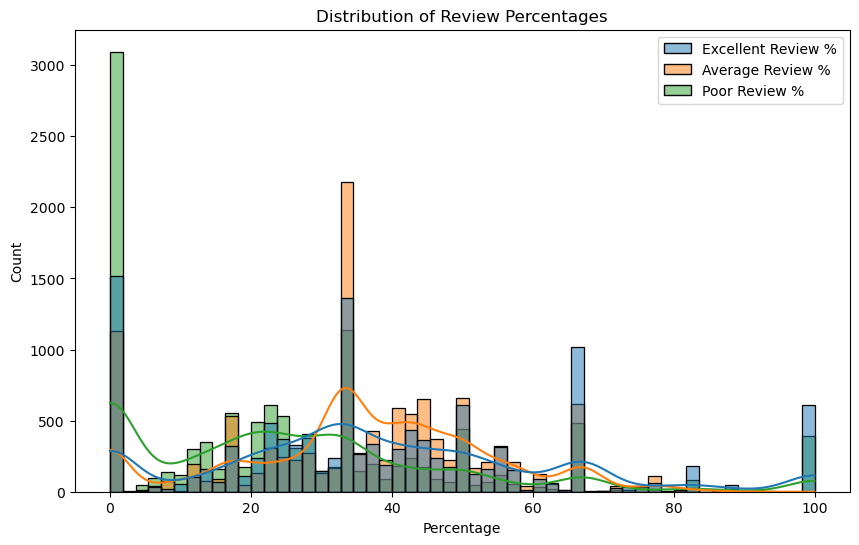

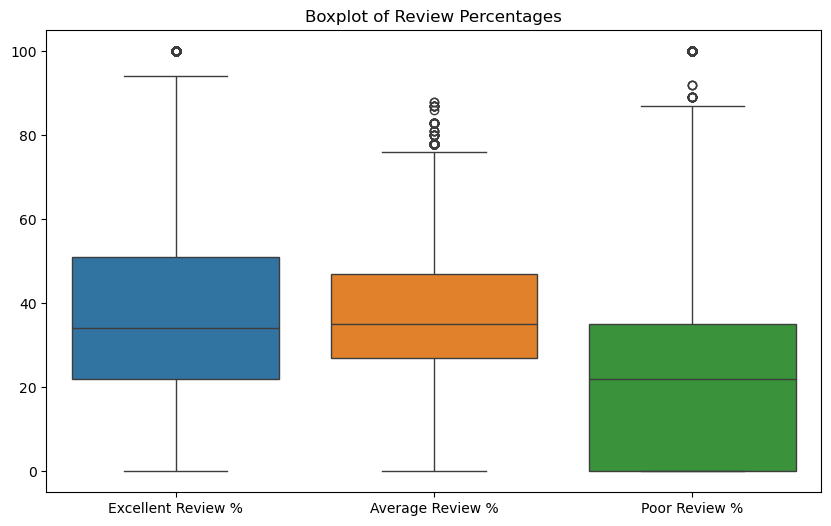

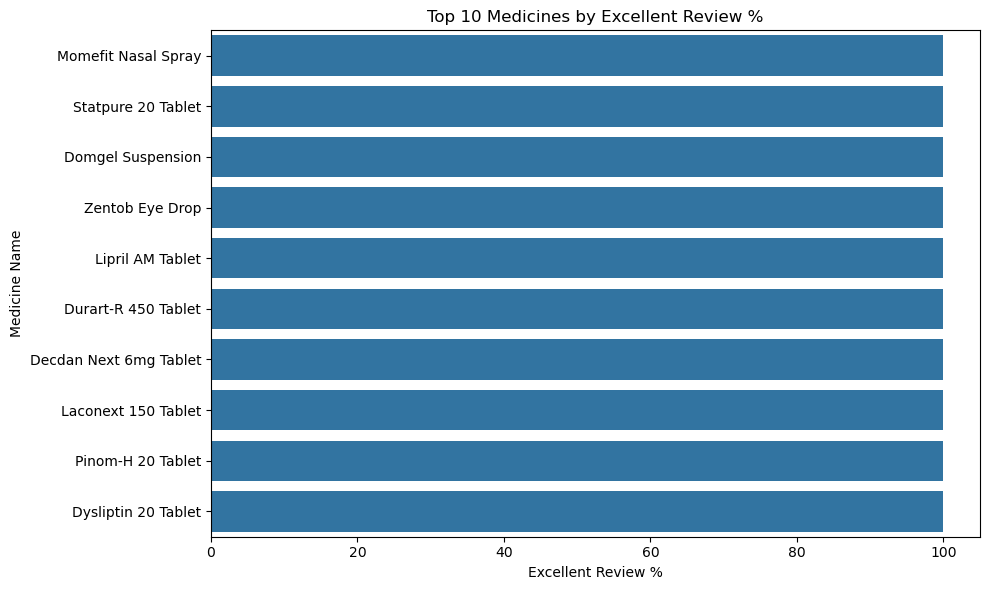

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the distribution of review categories
fig1, ax1 = plt.subplots(figsize=(10, 6))
sns.histplot(data[['Excellent Review %', 'Average Review %', 'Poor Review %']], kde=True, ax=ax1)
ax1.set_title('Distribution of Review Percentages')
ax1.set_xlabel('Percentage')

# Boxplot to identify the spread of review percentages
fig2, ax2 = plt.subplots(figsize=(10, 6))
sns.boxplot(data=data[['Excellent Review %', 'Average Review %', 'Poor Review %']], ax=ax2)
ax2.set_title('Boxplot of Review Percentages')

# Bar plot for top 10 medicines with the highest Excellent Review %
top_medicines = data[['Medicine Name', 'Excellent Review %']].sort_values(by='Excellent Review %', ascending=False).head(10)
fig4, ax4 = plt.subplots(figsize=(10, 6))
sns.barplot(x='Excellent Review %', y='Medicine Name', data=top_medicines, ax=ax4)
ax4.set_title('Top 10 Medicines by Excellent Review %')

# Show the plots
plt.tight_layout()
plt.show()

# Machine Learning (ML)

### Simple Linear Equation

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target for Simple Linear Regression
# We will predict 'Excellent Review %' using 'Average Review %' as a feature for simplicity
X = data[['Average Review %']]
y = data['Excellent Review %']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Simple Linear Regression model
simple_lr_model = LinearRegression()
simple_lr_model.fit(X_train, y_train)

# Making predictions
y_pred_simple_lr = simple_lr_model.predict(X_test)

# Calculating performance metrics
mse_simple_lr = mean_squared_error(y_test, y_pred_simple_lr)
r2_simple_lr = r2_score(y_test, y_pred_simple_lr)

print(f'MSE: {mse_simple_lr}')
print(f'R²: {r2_simple_lr}')

MSE: 524.3744683812603
R²: 0.1944425162149067


### Multiple Linear Equation

In [18]:
# For Multiple Linear Regression, let's include 'Average Review %' and 'Poor Review %' as predictors
X_multi = data[['Average Review %', 'Poor Review %']]
y_multi = data['Excellent Review %']

# Splitting the data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Creating and training the Multiple Linear Regression model
multi_lr_model = LinearRegression()
multi_lr_model.fit(X_train_multi, y_train_multi)

# Making predictions
y_pred_multi_lr = multi_lr_model.predict(X_test_multi)

# Calculating performance metrics
mse_multi_lr = mean_squared_error(y_test_multi, y_pred_multi_lr)
r2_multi_lr = r2_score(y_test_multi, y_pred_multi_lr)

print(f'MSE: {mse_multi_lr}')
print(f'R²: {r2_multi_lr}')

MSE: 9.013622768639271e-26
R²: 1.0


### Decision Tree Regression

In [20]:
from sklearn.tree import DecisionTreeRegressor

# Creating and training the Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train_multi, y_train_multi)

# Making predictions
y_pred_tree = decision_tree_model.predict(X_test_multi)

# Calculating performance metrics
mse_tree = mean_squared_error(y_test_multi, y_pred_tree)
r2_tree = r2_score(y_test_multi, y_pred_tree)

print(f'MSE: {mse_tree}')
print(f'R²: {r2_tree}')

MSE: 0.18224101479915433
R²: 0.9997200366871842


### Random Forest Regression

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Creating and training the Random Forest Regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_multi, y_train_multi)

# Making predictions
y_pred_forest = random_forest_model.predict(X_test_multi)

# Calculating performance metrics
mse_forest = mean_squared_error(y_test_multi, y_pred_forest)
r2_forest = r2_score(y_test_multi, y_pred_forest)

print(f'MSE: {mse_forest}')
print(f'R²: {r2_forest}')

MSE: 0.08748300211416488
R²: 0.9998656063723419


# Deep Learning

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Standardizing the features for better performance in neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_multi)
X_test_scaled = scaler.transform(X_test_multi)

# Creating a simple feedforward neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train_multi, validation_data=(X_test_scaled, y_test_multi), epochs=50, batch_size=32)

# Evaluate the model
y_pred_nn = model.predict(X_test_scaled)

# Calculate performance metrics
mse_nn = mean_squared_error(y_test_multi, y_pred_nn)
r2_nn = r2_score(y_test_multi, y_pred_nn)

print(f'MSE: {mse_nn}')
print(f'R²: {r2_nn}')

Epoch 1/50
197/296 [==================>...........] - ETA: 0s - loss: 1389.0531 

2024-09-06 12:49:00.841262: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


296/296 [==============================] - 0s 429us/step - loss: 950.0746 - val_loss: 40.1730
Epoch 2/50
296/296 [==============================] - 0s 295us/step - loss: 15.1513 - val_loss: 3.4463
Epoch 3/50
296/296 [==============================] - 0s 362us/step - loss: 1.2343 - val_loss: 0.5572
Epoch 4/50
296/296 [==============================] - 0s 298us/step - loss: 0.3401 - val_loss: 0.2379
Epoch 5/50
296/296 [==============================] - 0s 296us/step - loss: 0.1717 - val_loss: 0.1404
Epoch 6/50
296/296 [==============================] - 0s 292us/step - loss: 0.1118 - val_loss: 0.0962
Epoch 7/50
296/296 [==============================] - 0s 291us/step - loss: 0.0762 - val_loss: 0.0672
Epoch 8/50
296/296 [==============================] - 0s 290us/step - loss: 0.0538 - val_loss: 0.0479
Epoch 9/50
296/296 [==============================] - 0s 289us/step - loss: 0.0392 - val_loss: 0.0361
Epoch 10/50
296/296 [==============================] - 0s 292us/step - loss: 0.0295 - val

### Experimenting with different architectures

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate MSE and R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2

# Architecture 1: Basic Model
model_1 = Sequential()
model_1.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mean_squared_error')

mse_1, r2_1 = evaluate_model(model_1, X_train_scaled, X_test_scaled, y_train_multi, y_test_multi)

# Architecture 2: Deeper Model
model_2 = Sequential()
model_2.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mean_squared_error')

mse_2, r2_2 = evaluate_model(model_2, X_train_scaled, X_test_scaled, y_train_multi, y_test_multi)

# Architecture 3: Wider Model
model_3 = Sequential()
model_3.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(1))
model_3.compile(optimizer='adam', loss='mean_squared_error')

mse_3, r2_3 = evaluate_model(model_3, X_train_scaled, X_test_scaled, y_train_multi, y_test_multi)

# Print out results
print(f'Architecture 1 (Basic Model): MSE = {mse_1}, R² = {r2_1}')
print(f'Architecture 2 (Deeper Model): MSE = {mse_2}, R² = {r2_2}')
print(f'Architecture 3 (Wider Model): MSE = {mse_3}, R² = {r2_3}')

74/74 [==============================] - 0s 229us/step
Architecture 1 (Basic Model): MSE = 0.0004983464106410379, R² = 0.999999234427485
Architecture 2 (Deeper Model): MSE = 0.00030606699185132456, R² = 0.999999529812051
Architecture 3 (Wider Model): MSE = 0.0001653805406345694, R² = 0.9999997459381793


# Feature Importance

74/74 [==============================] - 0s 161us/step


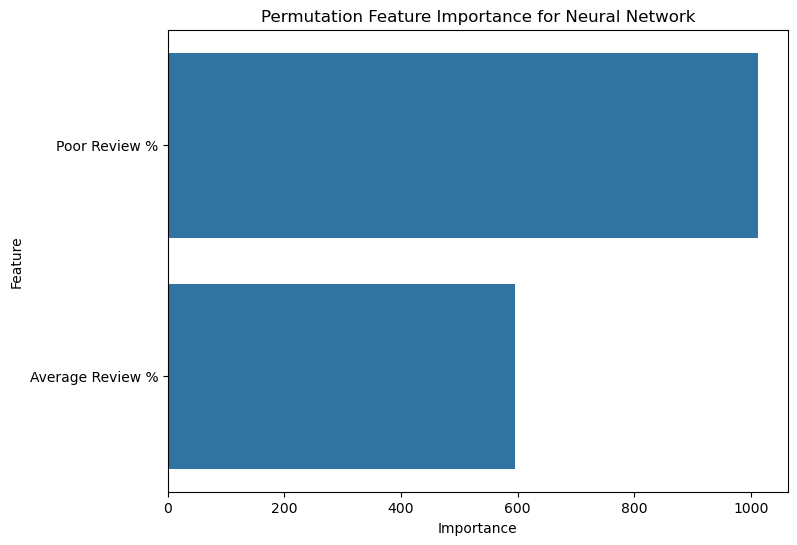

,Feature,Importance
1,Poor Review %,1012.988121
0,Average Review %,595.903008


In [28]:
# feature importance from the Neural Network Model
import numpy as np
from sklearn.metrics import mean_squared_error

# Function to compute permutation feature importance
def permutation_importance(model, X_test, y_test, scoring_func=mean_squared_error, n_repeats=10):
    baseline_score = scoring_func(y_test, model.predict(X_test))  # Baseline score with original data
    importances = np.zeros(X_test.shape[1])  # To store importance for each feature

    for col_idx in range(X_test.shape[1]):
        score_diffs = []  # To store score differences for each repeat
        for _ in range(n_repeats):
            X_test_permuted = X_test.copy()
            np.random.shuffle(X_test_permuted[:, col_idx])  # Shuffle a single feature column
            permuted_score = scoring_func(y_test, model.predict(X_test_permuted))  # Compute score with permuted data
            score_diffs.append(permuted_score - baseline_score)  # Score difference
        importances[col_idx] = np.mean(score_diffs)  # Average score difference over n_repeats

    return importances

# Assuming model_1 is your trained neural network and X_test_scaled, y_test_multi are your test data
importances = permutation_importance(model_1, X_test_scaled, y_test_multi)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_multi.columns,  # Feature names
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Permutation Feature Importance for Neural Network')
plt.show()

# Display the DataFrame for feature importance
importance_df

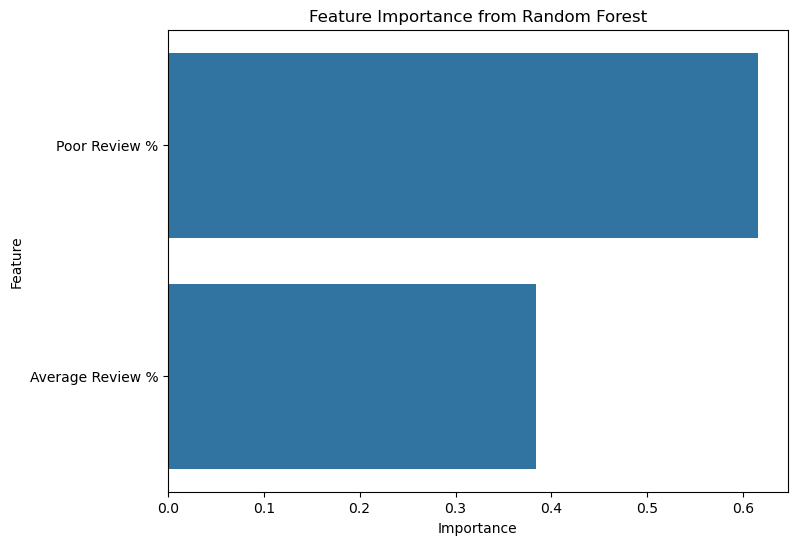

,Feature,Importance
1,Poor Review %,0.615833
0,Average Review %,0.384167


In [29]:
# feature importance from the Random Forest model
rf_importances = random_forest_model.feature_importances_

# Creating a DataFrame for better visualization
rf_feature_importance_df = pd.DataFrame({
    'Feature': X_multi.columns,  # Use your original feature names
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

# Display the DataFrame for feature importance
rf_feature_importance_df

# Factors that influence medicine effectiveness and patient satisfaction

In [31]:
# Display the correlation matrix
correlation_matrix_clean

,Excellent Review %,Average Review %,Poor Review %
Excellent Review %,1.000000,-0.427963,-0.725545
Average Review %,-0.427963,1.000000,-0.311464
Poor Review %,-0.725545,-0.311464,1.000000


In [50]:
# Display top 10 medicines with the highest Excellent Review %
top_medicines = data[['Medicine Name', 'Composition', 'Uses', 'Side_effects', 'Manufacturer', 'Excellent Review %']].sort_values(by='Excellent Review %', ascending=False).head(10)

# Show the top 10 medicines
top_medicines

,Medicine Name,Composition,Uses,Side_effects,Manufacturer,Excellent Review %
5912,Momefit Nasal Spray,Mometasone (50mcg),Treatment and prevention of Sneezing and runny...,Nasal irritation Sore throat Nosebleeds Upper ...,Entod Pharmaceuticals Ltd,100
9260,Statpure 20 Tablet,Rosuvastatin (20mg),Treatment of High cholesterol Prevention of he...,Muscle pain Weakness Headache Abdominal pain D...,Mankind Pharma Ltd,100
1698,Domgel Suspension,Magaldrate (400mg/5ml) + Simethicone (60mg/5ml),Acidity Stomach ulcers Bloating,Chalky taste Diarrhea Constipation,Beulah Biomedics Ltd,100
11708,Zentob Eye Drop,Tobramycin (0.3% w/v),Treatment of Bacterial eye infections,Eye irritation Burning sensation Eye redness E...,Nri Vision Care India Limited,100
5052,Lipril AM Tablet,Amlodipine (5mg) + Lisinopril (5mg),Hypertension (high blood pressure),Ankle swelling Headache Tiredness Palpitations...,Lupin Ltd,100
1690,Durart-R 450 Tablet,Darunavir (400mg) + Ritonavir (50mg),Treatment of HIV infection,Diarrhea Headache Nausea Abdominal pain Rash V...,Mylan Pharmaceuticals Pvt Ltd - A Viatris Company,100
1681,Decdan Next 6mg Tablet,Deflazacort (6mg),Treatment of Inflammatory conditionsTreatment ...,Increased appetite Weight gain Frequent urge t...,Wockhardt Ltd,100
5057,Laconext 150 Tablet,Lacosamide (150mg),Epilepsy/Seizures,Dizziness Headache Nausea Sleepiness Vomiting ...,Lupin Ltd,100
7894,Pinom-H 20 Tablet,Hydrochlorothiazide (12.5mg) + Olmesartan Medo...,Hypertension (high blood pressure),Dizziness Weakness Headache Tiredness Edema sw...,Lupin Ltd,100
1673,Dysliptin 20 Tablet,Atorvastatin (20mg),High cholesterolPrevention of Heart attack,Dyspepsia Abdominal pain Indigestion Diarrhea ...,East West Pharma,100


In [65]:
# Display the most common side effects for medicines with the lowest Excellent Review %
low_satisfaction_meds = data[['Medicine Name', 'Side_effects', 'Excellent Review %']].sort_values(by='Excellent Review %', ascending=True).head(10)

# Display the most common side effects for medicines with high satisfaction
high_satisfaction_meds = data[['Medicine Name', 'Side_effects', 'Excellent Review %']].sort_values(by='Excellent Review %', ascending=False).head(10)

display(low_satisfaction_meds, high_satisfaction_meds)

,Medicine Name,Side_effects,Excellent Review %
11824,Zedruff Shampoo,Application site reactions burning irritation ...,0
1542,Derisal 0.5mg Respules 2ml,Hoarseness of voice Sore throat Fungal infecti...,0
1541,Dianorm 80mg Tablet,Hypoglycemia low blood glucose level Weight ga...,0
6910,Ocuvir 400 DT Tablet,Headache Dizziness Vomiting Nausea Fatigue Fev...,0
6941,Oflokem OZ Tablet,Nausea Vomiting Dizziness Headache Insomnia di...,0
6946,Omnix 50 Dry Syrup,Abdominal pain Allergy Nausea Stomach pain Ind...,0
1530,Depotex 4mg Tablet,Thinning of skin Increased risk of infection R...,0
6961,Olife-M Oral Suspension,Vomiting Nausea Weight loss Abdominal pain Dia...,0
6963,Orthocort 6 Tablet,Increased appetite Weight gain Frequent urge t...,0
1523,Depranex 5 Tablet,Anorgasmia decreased orgasm in women Decreased...,0


,Medicine Name,Side_effects,Excellent Review %
5912,Momefit Nasal Spray,Nasal irritation Sore throat Nosebleeds Upper ...,100
9260,Statpure 20 Tablet,Muscle pain Weakness Headache Abdominal pain D...,100
1698,Domgel Suspension,Chalky taste Diarrhea Constipation,100
11708,Zentob Eye Drop,Eye irritation Burning sensation Eye redness E...,100
5052,Lipril AM Tablet,Ankle swelling Headache Tiredness Palpitations...,100
1690,Durart-R 450 Tablet,Diarrhea Headache Nausea Abdominal pain Rash V...,100
1681,Decdan Next 6mg Tablet,Increased appetite Weight gain Frequent urge t...,100
5057,Laconext 150 Tablet,Dizziness Headache Nausea Sleepiness Vomiting ...,100
7894,Pinom-H 20 Tablet,Dizziness Weakness Headache Tiredness Edema sw...,100
1673,Dysliptin 20 Tablet,Dyspepsia Abdominal pain Indigestion Diarrhea ...,100


# Identify the most common side effects and their associated medicines.

In [63]:
# Most Common Side Effects and Associated Medicines:
from collections import Counter

# Extract the 'Side_effects' column and split side effects into individual effects
side_effects_series = data['Side_effects'].str.split(', ').explode()  # Splitting and exploding into individual side effects

# Count the occurrences of each side effect
side_effects_count = Counter(side_effects_series)

# Convert the Counter to a DataFrame for better visualization
side_effects_df = pd.DataFrame(side_effects_count.items(), columns=['Side Effect', 'Count']).sort_values(by='Count', ascending=False)

# Display the top 10 most common side effects
top_side_effects = side_effects_df.head(10)

# Now, let's find the associated medicines for these top side effects
top_side_effects_list = top_side_effects['Side Effect'].tolist()

# Filtering the medicines associated with the top 10 side effects
associated_medicines = data[data['Side_effects'].apply(lambda x: any(effect in x for effect in top_side_effects_list))]

# Display the associated medicines for the top side effects
display(top_side_effects, associated_medicines[['Medicine Name', 'Side_effects']])

,Side Effect,Count
9,Application site reactions burning irritation ...,390
99,Hypoglycemia low blood glucose level Headache ...,173
30,No common side effects seen,149
88,Dizziness Sleepiness Tiredness Uncoordinated b...,126
374,Application site reactions burning irritation ...,118
178,Nausea Abdominal pain Constipation Dizziness H...,112
119,Limited data available,98
112,Skin peeling Application site reactions burnin...,95
107,Nausea Diarrhea Abdominal pain Hypoglycemia lo...,86
194,Muscle pain Weakness Headache Abdominal pain D...,82


,Medicine Name,Side_effects
11,Anovate Cream,Application site reactions burning irritation ...
43,Aquasol A Capsule,No common side effects seen
60,Aziderm 20% Cream,Application site reactions burning irritation ...
68,Acivir Cream,Application site reactions burning irritation ...
77,Alciflox D Eye/Ear Drops,Application site reactions burning irritation ...
...,...,...
11802,Zerostiff Sachet Orange Pineapple,No common side effects seen
11806,Zuemeth Tablet,No common side effects seen
11819,Zenegra Lido Spray,Allergic reaction Application site reactions b...
11823,Zedruff Shampoo,Application site reactions burning irritation ...


# End of Presentation Thank You